In [1]:
import numpy as np
import scipy.stats as sps
import scipy

import random as rnd

from itertools import repeat

Here we are trying to see if rank is a good way to scale data for the purposes of reducing the over-representation of high expression features.

Additionally, we're going to see if the creation of many auxiliary variables consisting of random combinations of features is going to produce results less vulnerable to scarcity issues. 

In [2]:
counts = np.loadtxt('../raw_data/vision_sc/wolf_counts.txt')
header = np.loadtxt('../raw_data/vision_sc/wolf_gene_header.txt',dtype=str)

In [9]:
rank_matrix = np.zeros(counts.shape)
for i,c in enumerate(counts.T):
    rank_matrix[:,i] = sps.rankdata(c,method='min')
rank_matrix = rank_matrix

In [10]:
np.savetxt('./rank_aux_test/rank_matrix.txt',rank_matrix)

In [ ]:
## Here we have created a matrix with rank values instead of raw values. We would like to use minimum ranking in order to emphasize the equality of sparse features.
## This may still be biased towards higher-expression features due to dropout-expression correlation
## but it's not really a well-tractable problem.

In [5]:
### First let's try making a forest using the rank matrix

In [7]:
import sys
sys.path.append("./src/")
import lumberjack
import tree_reader as tr
import tree_braider2 as trbr

In [15]:
rank_forest = lumberjack.fit(rank_matrix,header=header,trees=200,input_feature_subsample=200,output_feature_subsample=200,sample_subsample=1000,dispersion_mode='ssme',norm='l2',drop='none')

Setting context
Input:(1645, 3990)
Output:(1645, 3990)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo
['input.counts', 'tmp.ifh', 'output.counts', 'tmp.ofh']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.ifh -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.ofh -trees 200 -input_feature_subsample 200 -output_feature_subsample 200 -sample_subsample 1000 -dispersion_mode ssme -norm l2 -drop none
Trying to readline

1 663 1614 1 1146 1133 962 1 1 1 394 1316 675 1171 1 1638 1644 1 

Initializing: 1200
Initializing: 1400
Initializing: 1600
Initializing: 1800
Initializing: 2000
Initializing: 2200
Initializing: 2400
Initializing: 2600
Initializing: 2800
Initializing: 3000
Initializing: 3200
Initializing: 3400
Initializing: 3600
Initializing: 3800
Made rank table with 3990 features, 1645 samples:
Initializing: 0
Initializing: 200
Initializing: 400
Initializing: 600
Initializing: 800
Initializing: 1000
Initializing: 1200
Initializing: 1400
Initializing: 1600
Initializing: 1800
Initializing: 2000
Initializing: 2200
Initializing: 2400
Initializing: 2600
Initializing: 2800
Initializing: 3000
Initializing: 3200
Initializing: 3400
Initializing: 3600
Initializing: 3800
Made rank table with 3990 features, 1645 samples:
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.0.compact
Prototype tree: 3991,3991,1645
Parameters:200,200,1000
Unwrapping tree
Tree Pool: Request for tree: 1
Tree Pool: Deriving 1
Deriving from prototype: 1000,200,200
Derived 

Tree Pool: Sending 25
Tree Pool: Request for tree: 26
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.25.compact
Tree Pool: Deriving 26
Deriving from prototype: 1000,200,200
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 26
SSME
Tree Pool: Sending 26
Tree Pool: Request for tree: 27
Tree Pool: Deriving 27
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.26.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 27
SSME
Tree Pool: Sending 27
Tree Pool: Request for tree: 28
Tree Pool: Deriving 28
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.27.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 28
SSME
Tree Pool: Sending 28
Tree Pool: Request for tree: 29
Tree Pool: Deriving 29
Deriving from 

Tree Pool: Sending 53
Tree Pool: Request for tree: 54
Tree Pool: Deriving 54
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.53.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 54
SSME
Tree Pool: Sending 54
Tree Pool: Request for tree: 55
Tree Pool: Deriving 55
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.54.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 55
SSME
Tree Pool: Sending 55
Tree Pool: Request for tree: 56
Tree Pool: Deriving 56
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.55.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 56
SSME
Tree Pool: Sending 56
Tree Pool: Request for tree: 57
Tree Pool: Deriving 57
Deriving from 

Tree Pool: Sending 81
Tree Pool: Request for tree: 82
Tree Pool: Deriving 82
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.81.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 82
SSME
Tree Pool: Sending 82
Tree Pool: Request for tree: 83
Tree Pool: Deriving 83
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.82.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 83
SSME
Tree Pool: Sending 83
Tree Pool: Request for tree: 84
Tree Pool: Deriving 84
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.83.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 84
SSME
Tree Pool: Sending 84
Tree Pool: Request for tree: 85
Tree Pool: Deriving 85
Serializing to

Tree Pool: Sending 108
Tree Pool: Request for tree: 109
Tree Pool: Deriving 109
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.108.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 109
SSME
Tree Pool: Sending 109
Tree Pool: Request for tree: 110
Tree Pool: Deriving 110
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.109.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 110
SSME
Tree Pool: Sending 110
Tree Pool: Request for tree: 111
Tree Pool: Deriving 111
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.110.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 111
SSME
Tree Pool: Sending 111
Tree Pool: Request for tree: 112
Tree Pool: Deriving 

Tree Pool: Sending 135
Tree Pool: Request for tree: 136
Tree Pool: Deriving 136
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.135.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 136
SSME
Tree Pool: Sending 136
Tree Pool: Request for tree: 137
Tree Pool: Deriving 137
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.136.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 137
SSME
Tree Pool: Sending 137
Tree Pool: Request for tree: 138
Tree Pool: Deriving 138
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.137.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 138
SSME
Tree Pool: Sending 138
Tree Pool: Request for tree: 139
Tree Pool: Deriving 

Tree Pool: Sending 162
Tree Pool: Request for tree: 163
Tree Pool: Deriving 163
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.162.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 163
SSME
Tree Pool: Sending 163
Tree Pool: Request for tree: 164
Tree Pool: Deriving 164
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.163.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 164
SSME
Tree Pool: Sending 164
Tree Pool: Request for tree: 165
Tree Pool: Deriving 165
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.164.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 165
SSME
Tree Pool: Sending 165
Tree Pool: Request for tree: 166
Tree Pool: Deriving 

Tree Pool: Sending 189
Tree Pool: Request for tree: 190
Tree Pool: Deriving 190
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.189.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 190
SSME
Tree Pool: Sending 190
Tree Pool: Request for tree: 191
Tree Pool: Deriving 191
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.190.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 191
SSME
Tree Pool: Sending 191
Tree Pool: Request for tree: 192
Tree Pool: Deriving 192
Deriving from prototype: 1000,200,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpe_o9_7fo/tmp.191.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 192
SSME
Tree Pool: Sending 192
Tree Pool: Request for tree: 193
Tree Pool: Deriving 

WARNING, UNREPRESENTED FEATURES


In [50]:
rank_forest.backup("./rank_forest")

Clustering has already been done
Running /Users/boris/haxx/python/smooth_density_graph/target/release/smooth_density_graph
Command: /Users/boris/haxx/python/smooth_density_graph/target/release/smooth_density_graph fitpredict -c /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpx3ig_do5 -auto 2>/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpj1ctpcee
Broke loop


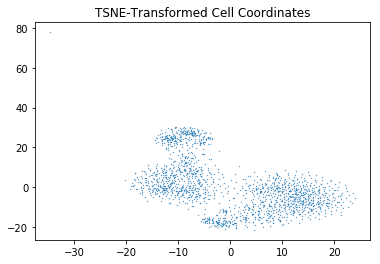

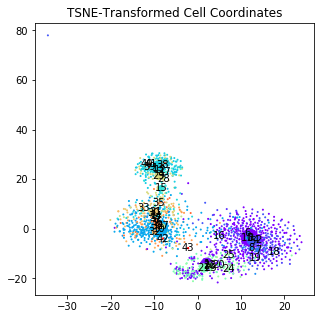

In [20]:
rank_forest.cluster_samples_encoding()
rank_forest.cluster_leaf_samples()
rank_forest.tsne_encoding()
rank_forest.plot_cell_clusters()

In [16]:
braid = trbr.IHMM(rank_forest,start_states=100,alpha_e=.5,beta_e=.5)

./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:967: RuntimeWarning: invalid value encountered in double_scalars
  draw -= w
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:967: RuntimeWarning: invalid value encountered in double_scalars
  draw -= w
./src/tree_braider2.py:967: RuntimeWarning: invalid

In [18]:
for i in range(100):
    print("********")
    print(f"SWEEP:{i}")
    braid.sweep()


********
SWEEP:0
14
[0 0 0 ... 5 3 6]
[3200, 53, 56, 528, 110, 580, 668, 362, 146, 95, 56, 39, 60, 247]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:7
14
[0 0 0 ... 5 3 6]
[3200, 58, 62, 533, 101, 587, 658, 365, 152, 95, 54, 37, 59, 239]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:7
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1.  7.  2.  2. 12.  5.  3

Beta:3
Gamma:8
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1. 7. 1. 4. 7. 3. 1. 1. 1. 1. 1. 5.]
Sampling states
New state created
0
********
SWEEP:8
14
[0 0 0 ... 5 3 6]
[3200, 59, 47, 534, 115, 582, 655, 355, 150, 98, 58, 41, 61, 245]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:8
14
[0 0 0 ... 5 3 6]
[3200, 60, 65, 543, 103, 590, 645, 364, 139, 96, 58, 38, 62, 237]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recompu

Beta:3
Gamma:7
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1.  6.  1.  5. 10.  3.  1.  1.  2.  1.  2.  2.]
Sampling states
New state created
0
********
SWEEP:16
14
[0 0 0 ... 5 3 6]
[3200, 56, 57, 530, 109, 564, 660, 359, 146, 107, 63, 46, 62, 241]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:8
14
[0 0 0 ... 5 3 6]
[3200, 63, 59, 535, 100, 589, 635, 373, 141, 102, 63, 43, 64, 233]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transit

Beta:3
Gamma:6
Computing state log odds | divergence
Computing oracle odds
[0. 2. 1. 9. 2. 6. 8. 5. 2. 1. 2. 2. 1. 5.]
Sampling states
New state created
0
********
SWEEP:24
14
[0 0 0 ... 5 3 6]
[3200, 57, 62, 527, 118, 570, 652, 362, 142, 106, 63, 47, 61, 233]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:7
14
[0 0 0 ... 5 3 6]
[3200, 62, 60, 552, 95, 595, 636, 350, 146, 104, 65, 39, 68, 228]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recom

Beta:3
Gamma:6
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1. 10.  1.  7. 11.  5.  1.  1.  1.  2.  1.  3.]
Sampling states
New state created
0
********
SWEEP:32
14
[0 0 0 ... 5 3 6]
[3200, 58, 58, 523, 113, 574, 666, 361, 145, 101, 62, 41, 63, 235]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:8
14
[0 0 0 ... 5 3 6]
[3200, 65, 65, 544, 103, 581, 631, 355, 145, 105, 63, 36, 69, 238]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transit

Beta:3
Gamma:8
Computing state log odds | divergence
Computing oracle odds
[0. 2. 1. 5. 2. 6. 8. 2. 3. 1. 2. 1. 1. 1.]
Sampling states
New state created
0
********
SWEEP:40
14
[0 0 0 ... 5 3 6]
[3200, 66, 58, 528, 114, 579, 649, 364, 141, 97, 63, 42, 63, 236]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:7
14
[0 0 0 ... 5 3 6]
[3200, 72, 55, 541, 113, 587, 633, 350, 148, 99, 64, 37, 63, 238]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomp

Beta:3
Gamma:7
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1. 8. 1. 4. 9. 2. 3. 1. 1. 1. 1. 3.]
Sampling states
New state created
0
********
SWEEP:48
14
[0 0 0 ... 5 3 6]
[3200, 62, 53, 520, 117, 575, 668, 365, 133, 102, 63, 41, 63, 238]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:7
14
[0 0 0 ... 5 3 6]
[3200, 75, 53, 546, 117, 587, 628, 348, 147, 100, 64, 38, 61, 236]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Reco

Beta:3
Gamma:7
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1.  6.  1.  4. 10.  5.  1.  2.  1.  2.  1.  5.]
Sampling states
New state created
0
********
SWEEP:56
14
[0 0 0 ... 5 3 6]
[3200, 70, 52, 527, 115, 579, 663, 353, 130, 104, 68, 42, 68, 229]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:6
14
[0 0 0 ... 5 3 6]
[3200, 76, 52, 551, 110, 584, 631, 353, 137, 105, 63, 39, 62, 237]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transit

Beta:3
Gamma:7
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1. 6. 2. 2. 6. 7. 4. 1. 1. 1. 1. 3.]
Sampling states
New state created
0
********
SWEEP:64
14
[0 0 0 ... 5 3 6]
[3200, 69, 51, 526, 117, 578, 659, 353, 139, 99, 64, 38, 71, 236]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:7
14
[0 0 0 ... 5 3 6]
[3200, 68, 54, 535, 118, 583, 640, 356, 145, 97, 63, 38, 65, 238]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomp

Beta:3
Gamma:7
Computing state log odds | divergence
Computing oracle odds
[0. 2. 1. 6. 1. 5. 8. 4. 3. 1. 1. 1. 1. 3.]
Sampling states
New state created
0
********
SWEEP:72
14
[0 0 0 ... 5 3 6]
[3200, 59, 54, 531, 117, 586, 641, 359, 140, 99, 65, 39, 74, 236]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:8
14
[0 0 0 ... 5 3 6]
[3200, 69, 49, 541, 110, 578, 647, 358, 142, 99, 65, 38, 71, 233]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomp

Beta:3
Gamma:6
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1. 10.  2.  6.  9.  3.  1.  1.  3.  2.  1.  3.]
Sampling states
New state created
0
********
SWEEP:80
14
[0 0 0 ... 5 3 6]
[3200, 63, 48, 539, 120, 584, 634, 360, 136, 99, 64, 41, 73, 239]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:6
14
[0 0 0 ... 5 3 6]
[3200, 68, 52, 535, 116, 578, 649, 357, 142, 101, 64, 37, 65, 236]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transiti

Beta:3
Gamma:9
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1. 1. 1. 8. 6. 5. 2. 1. 1. 1. 1. 2.]
Sampling states
New state created
0
********
SWEEP:88
14
[0 0 0 ... 5 3 6]
[3200, 68, 46, 542, 112, 584, 648, 349, 140, 101, 65, 40, 71, 234]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:9
14
[0 0 0 ... 5 3 6]
[3200, 72, 49, 515, 117, 582, 658, 363, 138, 101, 62, 35, 72, 236]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Reco

Beta:3
Gamma:9
Computing state log odds | divergence
Computing oracle odds
[0. 1. 1. 3. 1. 5. 6. 2. 3. 2. 1. 2. 1. 2.]
Sampling states
New state created
0
********
SWEEP:96
14
[0 0 0 ... 5 3 6]
[3200, 67, 50, 535, 115, 578, 653, 354, 140, 102, 64, 36, 71, 235]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:8
14
[0 0 0 ... 5 3 6]
[3200, 72, 51, 536, 114, 574, 639, 360, 143, 105, 65, 36, 69, 236]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Reco

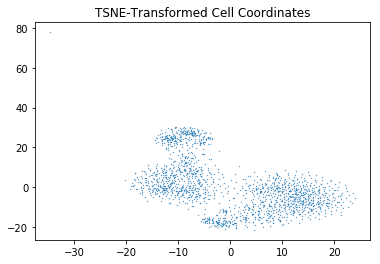

Recomputing Transition Counts
14
[0 0 0 ... 5 3 6]
[3200, 72, 52, 533, 115, 578, 645, 357, 142, 104, 63, 37, 67, 235]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
Computing State Masks
Recomputing Sample Log Odds
(14, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:3
Gamma:9


/Users/boris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


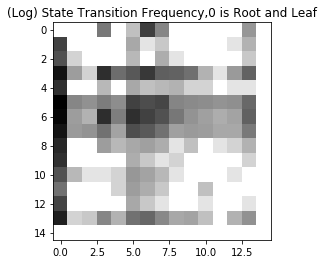

3200


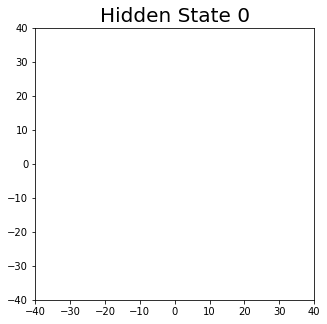

72


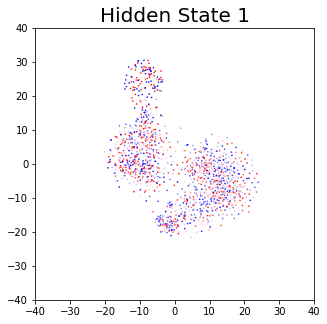

52


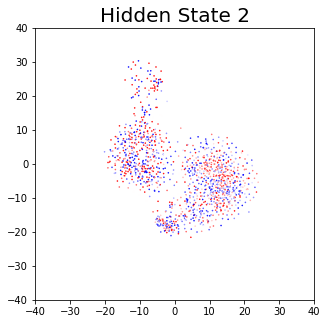

533


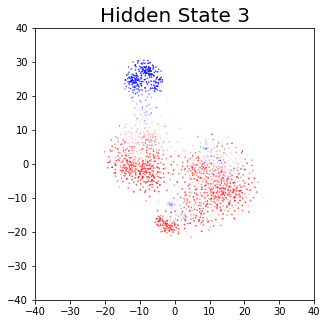

115


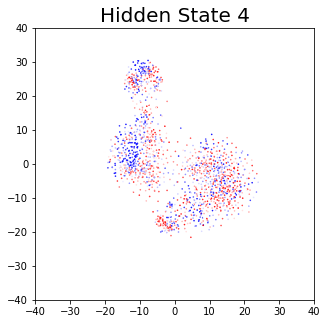

578


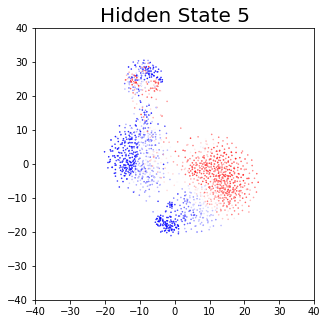

645


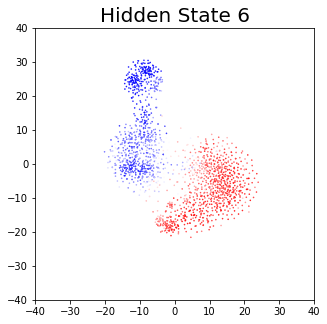

357


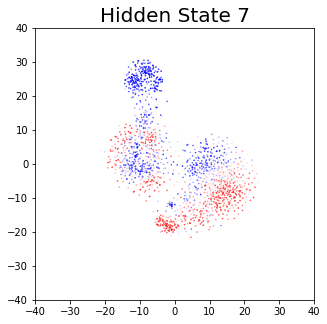

142


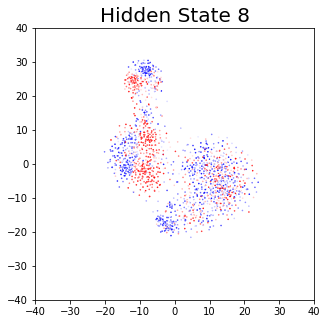

104


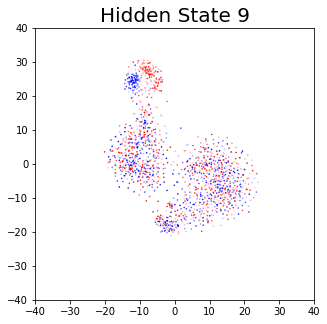

63


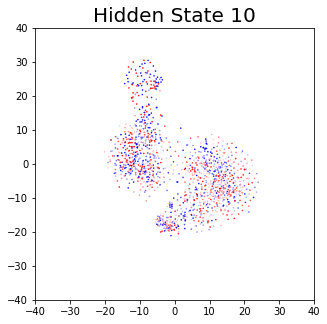

37


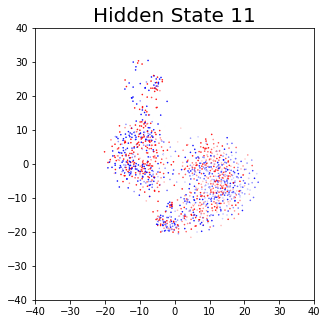

67


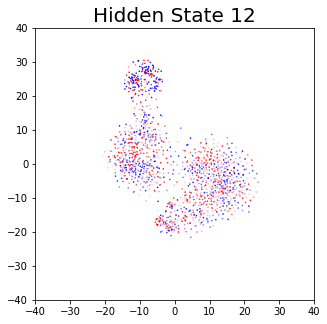

235


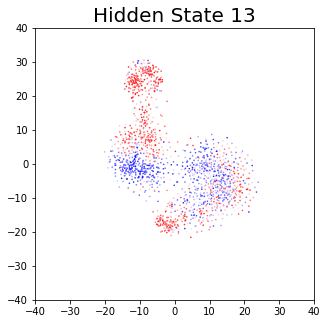

In [24]:
import matplotlib.pyplot as plt

iftc = rank_forest.tsne_encoding(override=True)

plt.figure()
plt.title("(Log) State Transition Frequency,0 is Root and Leaf")
plt.imshow(np.log(braid.pad_root_transitions(braid.raw_transition_counts()).T),cmap='binary')
plt.show()
  
# print(braid.state_raw_sample_odds[1])
for hidden_state in range(braid.hidden_states):
    print(np.sum(braid.state_masks[hidden_state]))
    plt.figure(figsize=(5,5))
    plt.title(f"Hidden State {hidden_state}",fontsize=20)
    plt.scatter(iftc[:,0],iftc[:,1],c=braid.lr_finite(hidden_state),cmap='bwr',s=.3)
    plt.ylim(-40,40)
    plt.xlim(-40,40)
#     plt.colorbar()
#     plt.scatter(iftc[:,0],iftc[:,1],c=braid.state_raw_sample_odds[hidden_state],s=1,cmap='PuOr')
    plt.show()

In [ ]:
## Now let's try projecting a lot of features together. Firstly, we'd like ideally to avoid cancelling the effects of
## anticorrelated features on each other. Therefore, we'll first need a spearman's rho table. 

## There's no native implementation of spearman's rho for numpy, but spearman's rho is just the correlation of ranks,
## which we already conveniently have!

# spearmans = scipy.spatial.distance.pdist(rank_matrix,metric='correlation')

In [25]:
## I think for the first part, I'll simply pick features at random, but for each feature I add I will flip it if it
## has a negative rank correlation to aggregate. 

def rank_average(rank_matrix):
    log_rank = np.log(rank_matrix)
    geometric_mean = np.exp(np.sum(log_rank,axis=0) / rank_matrix.shape[0])
    return geometric_mean

def make_aux(rank_matrix,n):
    features = np.zeros((n,rank_matrix.shape[1]))
    feature_indecies = []
    for i in range(n):
        ci = rnd.randint(0,rank_matrix.shape[0]-1)
        features[i] = rank_matrix[ci]
        feature_indecies.append(ci)
    average_rank = np.mean(features,axis=0)
    correlations = np.array([sps.pearsonr(f,average_rank)[0] for f in features])
    flip = correlations < 0
    features[flip] = (features.shape[1] - features[flip]) * -1
    real_average = rank_average(features)
    return real_average,feature_indecies
    


In [26]:
ar,fi = make_aux(rank_matrix,5)
print(list(ar))
print(list(fi))

[4.372901478014607, 203.88240175572653, 4.3081099650477475, 62.615880738241, 884.658379773169, 1.0, 4.384327654865777, 4.230462591039885, 17.788128079479378, 75.10189932825942, 70.06683601310284, 76.85970145847351, 18.246111269624397, 1037.9569627928777, 1.0, 264.1889242809874, 259.1315330254726, 18.811326621837377, 4.336756837872127, 1204.8183872073512, 18.77727318379927, 4.2077406062899225, 73.89097855853197, 16.203471458422918, 269.39814234126624, 17.668265527745437, 4.275093735494932, 46.609067327057566, 280.0599361932241, 80.77793170337257, 1.0, 75.70423522327756, 60.94364991268962, 4.379445317967393, 1.0, 72.07786868766557, 1.0, 244.6973308639275, 4.348006682561799, 1.0, 72.68163482568073, 1.0, 1.0, 71.15024655720926, 1356.9889721691509, 77.95626393027729, 1.0, 4.242260629758311, 4.198770162475274, 4.321381918850224, 1058.0247997448291, 4.256369095523797, 1253.5626845969105, 4.201340971175475, 4.327672166619972, 72.9042413648598, 1.0, 1.0, 16.660178427630044, 454.8330986382522, 1

In [28]:
aux_matrix = np.zeros((counts.shape[0],2000))
aux_labels = np.zeros((2000,10))

for i in range(2000):
    aux_matrix[:,i],aux_labels[i] = make_aux(rank_matrix.T,10)
    
aux_labels = [",".join([str(m) for m in l]) for l in aux_labels]


/Users/boris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/boris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [29]:
np.savetxt('./rank_aux_test/aux_matrix.txt',aux_matrix)
np.savetxt('./rank_aux_test/aux_labels.txt',aux_labels,fmt='%s')

In [30]:
forest = lumberjack.fit(aux_matrix,output_counts=counts,trees=200,dispersion_mode="ssme",norm="l2",drop='none',sfr=1,in_feature_subsample=1000,out_feature_subsample=200,sample_subsample=1000,depth=10,leaves=100,ifh=aux_labels,ofh=header)
# forest = tr.Forest.reconstitute('./rank_aux_test/aux_forest')

Setting context
Input:(1645, 2000)
Output:(1645, 3990)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0
['input.counts', 'tmp.ifh', 'output.counts', 'tmp.ofh']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.ifh -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.ofh -trees 200 -dispersion_mode ssme -norm l2 -drop none -sfr 1 -in_feature_subsample 1000 -out_feature_subsample 200 -sample_subsample 1000 -depth 10 -leaves 100
Trying to readline

48.73098810351761 18.09613775922809 6.634

Initializing: 1000
Initializing: 1200
Initializing: 1400
Initializing: 1600
Initializing: 1800
Made rank table with 2000 features, 1645 samples:
Initializing: 0
Initializing: 200
Initializing: 400
Initializing: 600
Initializing: 800
Initializing: 1000
Initializing: 1200
Initializing: 1400
Initializing: 1600
Initializing: 1800
Initializing: 2000
Initializing: 2200
Initializing: 2400
Initializing: 2600
Initializing: 2800
Initializing: 3000
Initializing: 3200
Initializing: 3400
Initializing: 3600
Initializing: 3800
Made rank table with 3990 features, 1645 samples:
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.0.compact
Prototype tree: 2000,3991,1645
Parameters:1000,200,1000
Tree Pool: Request for tree: 1
Tree Pool: Deriving 1
Deriving from prototype: 1000,1000,200
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 1
SSME
Tree Pool: Sending 1
Tree Pool: Request for tree: 2
Tree Pool: Deriving 2
Deriving from prototype:

Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 26
SSME
Tree Pool: Sending 26
Tree Pool: Request for tree: 27
Tree Pool: Deriving 27
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.26.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 27
SSME
Tree Pool: Sending 27
Tree Pool: Request for tree: 28
Tree Pool: Deriving 28
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.27.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 28
SSME
Tree Pool: Sending 28
Tree Pool: Request for tree: 29
Tree Pool: Deriving 29
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.28.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 29
SSME
Tree Poo

Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 53
SSME
Tree Pool: Sending 53
Tree Pool: Request for tree: 54
Tree Pool: Deriving 54
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.53.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 54
SSME
Tree Pool: Sending 54
Tree Pool: Request for tree: 55
Tree Pool: Deriving 55
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.54.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 55
SSME
Tree Pool: Sending 55
Tree Pool: Request for tree: 56
Tree Pool: Deriving 56
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.55.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 56
SSME
Tree Poo

Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 80
SSME
Tree Pool: Sending 80
Tree Pool: Request for tree: 81
Tree Pool: Deriving 81
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.80.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 81
SSME
Tree Pool: Sending 81
Tree Pool: Request for tree: 82
Tree Pool: Deriving 82
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.81.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 82
SSME
Tree Pool: Sending 82
Tree Pool: Request for tree: 83
Tree Pool: Deriving 83
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.82.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 83
SSME
Tree Poo

Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 107
SSME
Tree Pool: Sending 107
Tree Pool: Request for tree: 108
Tree Pool: Deriving 108
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.107.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 108
SSME
Tree Pool: Sending 108
Tree Pool: Request for tree: 109
Tree Pool: Deriving 109
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.108.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 109
SSME
Tree Pool: Sending 109
Tree Pool: Request for tree: 110
Tree Pool: Deriving 110
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.109.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 1

Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 134
SSME
Tree Pool: Sending 134
Tree Pool: Request for tree: 135
Tree Pool: Deriving 135
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.134.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 135
SSME
Tree Pool: Sending 135
Tree Pool: Request for tree: 136
Tree Pool: Deriving 136
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.135.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 136
SSME
Tree Pool: Sending 136
Tree Pool: Request for tree: 137
Tree Pool: Deriving 137
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.136.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 1

Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 161
SSME
Tree Pool: Sending 161
Tree Pool: Request for tree: 162
Tree Pool: Deriving 162
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.161.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 162
SSME
Tree Pool: Sending 162
Tree Pool: Request for tree: 163
Tree Pool: Deriving 163
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.162.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 163
SSME
Tree Pool: Sending 163
Tree Pool: Request for tree: 164
Tree Pool: Deriving 164
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.163.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 1

Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 188
SSME
Tree Pool: Sending 188
Tree Pool: Request for tree: 189
Tree Pool: Deriving 189
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.188.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 189
SSME
Tree Pool: Sending 189
Tree Pool: Request for tree: 190
Tree Pool: Deriving 190
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.189.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 190
SSME
Tree Pool: Sending 190
Tree Pool: Request for tree: 191
Tree Pool: Deriving 191
Deriving from prototype: 1000,1000,200
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmplstwuph0/tmp.190.compact
Unwrapping tree
Derived from prototype, rank table size: (200, 1000)
Tree Pool: Growing 1

WARNING, UNREPRESENTED FEATURES


Clustering has already been done
Clustering has already been done


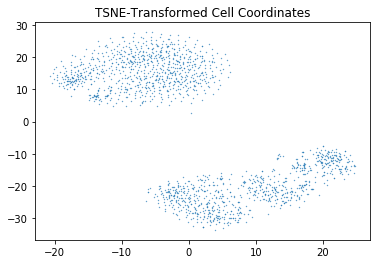

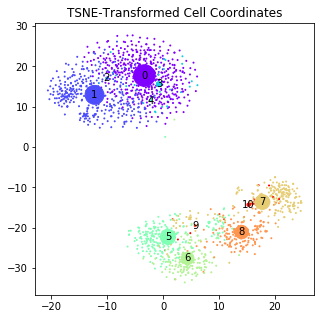

In [32]:
forest.cluster_samples_encoding(subsample=1300,distance='cos',k=10,steps=10,verbose=True,override=False)
forest.cluster_leaf_samples(subsample=1000,distance='cos',k=10,steps=10,verbose=True,override=False)
forest.tsne_encoding(override=True)
forest.plot_cell_clusters()

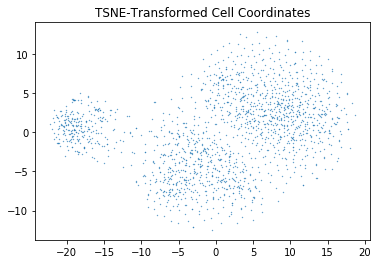

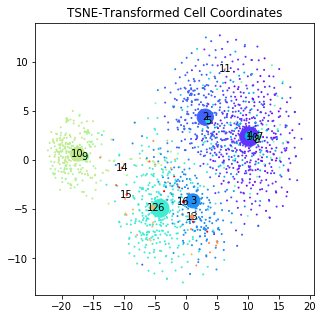

In [4]:
forest.tsne_encoding(override=True)
forest.plot_cell_clusters()

In [5]:
# forest.backup('./rank_aux_test/aux_forest')

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

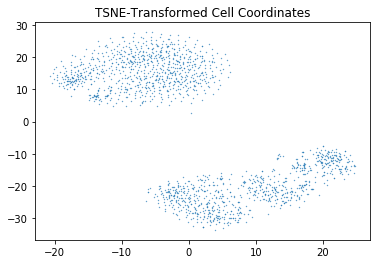

In [33]:
ttc = forest.tsne_encoding()
# ttc = TSNE().fit_transform(counts)

# plt.figure()
# plt.scatter(ttc[:,0],ttc[:,1],s=.1)
# plt.show()



In [47]:
braid = trbr.IHMM(forest,alpha_e=1,beta_e=1,start_states=100)

./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:967: RuntimeWarning: invalid value encountered in double_scalars
  draw -= w
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:967: RuntimeWarning: invalid value encountered in double_scalars
  draw -= w
./src/tree_braider2.py:958: RuntimeWarning: overflow encountered in exp2
  raw_odds = np.exp2(log_weights)
./src/tree_braider2.py:967: RuntimeWarning: invalid value encountered in double_scalars
  draw -= w
./src/tree_braider2.py:958: RuntimeWarning: overflow encou

In [48]:
for i in range(100):
    print(i)
    print(f"beta:{braid.beta}")
    print(f"gamma:{braid.gamma}")
    print(f"states:{braid.hidden_states}")
    braid.sweep()
#     braid.max_likelihood_sweep()
#     braid.sweep()
#     if i%10 == 0:
#         braid.max_likelihood_sweep()

0
beta:1
gamma:1
states:100
100
[ 0  0  0 ... 62 25 42]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31:

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:6
Gamma:14
58
[ 0  0  0 ... 35 19 17]
[3195, 3, 1, 8, 18, 70, 80, 36, 24, 54, 3, 36, 3, 9, 1, 30, 1, 430, 99, 471, 11, 32, 3, 1, 2, 1, 85, 18, 170, 39, 3, 24, 169, 16, 9, 34, 1, 14, 25, 1, 155, 71, 16, 24, 5, 3, 166, 14, 1, 14, 186, 18, 111, 53, 12, 70, 40, 1]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 

Beta:4
Gamma:17
Computing state log odds | divergence
Computing oracle odds
[0. 2. 2. 3. 1. 1. 1. 3. 2. 3. 7. 3. 4. 2. 5. 1. 4. 2. 2. 4. 1. 1. 1. 5.
 5. 1. 1. 3. 2.]
Sampling states
New state created
0
7
beta:4
gamma:17
states:29
29
[ 0  0  0 ... 17 12 10]
[3195, 20, 63, 80, 68, 68, 78, 56, 134, 60, 377, 82, 302, 154, 112, 59, 130, 64, 7, 263, 41, 49, 37, 210, 141, 2, 201, 67, 70]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28}
Computing State Masks
Recomputing Sample Log Odds
(29, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:16
29
[ 0  0  0 ... 17 12 10]
[3195, 21, 68, 77, 54, 77, 71, 64, 112, 73, 342, 89

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:15
28
[ 0  0  0 ... 17 12 10]
[3195, 28, 69, 85, 67, 68, 72, 60, 202, 67, 335, 107, 285, 161, 98, 55, 129, 58, 7, 202, 41, 60, 38, 218, 134, 203, 78, 68]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:15
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1.  3.  3.  1.  3.  1.  2.  1. 10.  2.  8.  4.  4.  1.  1.  1.
  1.  6.  1.  1.  3.  8.  3.  3.  1.  2.]
Sampling state

Beta:4
Gamma:15
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2. 4. 1. 2. 1. 2. 3. 2. 3. 6. 7. 2. 4. 1. 3. 3. 1. 7. 1. 2. 1. 4.
 5. 3. 2. 2.]
Sampling states
New state created
0
18
beta:4
gamma:15
states:28
28
[ 0  0  0 ... 17 12 10]
[3195, 23, 68, 81, 71, 72, 72, 57, 214, 71, 342, 95, 278, 168, 93, 49, 141, 58, 7, 208, 44, 64, 35, 217, 138, 185, 71, 73]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:15
28
[ 0  0  0 ... 17 12 10]
[3195, 26, 70, 82, 68, 67, 75, 63, 198, 68, 354, 100, 280, 173, 95, 5

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:16
28
[ 0  0  0 ... 17 12 10]
[3195, 27, 73, 86, 66, 74, 78, 55, 232, 71, 328, 94, 283, 181, 98, 49, 140, 55, 8, 192, 40, 59, 37, 212, 136, 180, 75, 66]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:16
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1.  1.  2.  3.  3.  1.  6.  1. 12.  2.  9.  1.  2.  1.  2.  2.
  1.  6.  1.  3.  1.  3.  1.  4.  1.  1.]
Sampling states

Beta:4
Gamma:17
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2. 3. 1. 2. 1. 4. 2. 1. 8. 2. 3. 3. 2. 1. 2. 1. 1. 7. 1. 2. 2. 3.
 6. 3. 1. 2.]
Sampling states
New state created
0
29
beta:4
gamma:17
states:28
28
[ 0  0  0 ... 17 12 10]
[3195, 28, 70, 82, 72, 68, 82, 57, 193, 72, 343, 92, 285, 182, 94, 49, 143, 53, 6, 210, 45, 62, 38, 216, 135, 177, 74, 67]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:16
28
[ 0  0  0 ... 17 12 10]
[3195, 26, 68, 82, 70, 72, 82, 50, 219, 65, 339, 92, 292, 198, 96, 57

Beta:4
Gamma:14
28
[ 0  0  0 ... 17 12 10]
[3195, 29, 70, 81, 75, 75, 92, 52, 200, 65, 344, 86, 287, 233, 86, 51, 122, 54, 6, 214, 46, 62, 35, 213, 126, 151, 69, 71]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:14
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1.  2.  1.  2.  1.  3.  6.  3. 10.  3.  9.  1.  2.  2.  3.  2.
  1.  9.  1.  2.  1.  6.  2.  3.  1.  3.]
Sampling states
New state created
0
35
beta:4
gamma:14
states:28
28
[ 0  0  0 ... 17 12 10]
[3195, 29, 70, 81, 75, 75, 92, 52, 200, 6

Beta:4
Gamma:15
Computing state log odds | divergence
Computing oracle odds
[0. 1. 3. 2. 1. 1. 2. 2. 4. 1. 9. 1. 5. 6. 1. 1. 3. 1. 2. 7. 1. 4. 1. 6.
 5. 4. 2. 1.]
Sampling states
New state created
0
40
beta:4
gamma:15
states:28
28
[ 0  0  0 ... 17 12 10]
[3195, 24, 70, 77, 69, 68, 98, 48, 205, 76, 353, 86, 278, 232, 53, 51, 108, 52, 5, 236, 38, 66, 36, 214, 140, 165, 76, 71]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:16
28
[ 0  0  0 ... 17 12 10]
[3195, 25, 69, 84, 82, 78, 100, 54, 200, 69, 331, 74, 284, 231, 61, 5

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:15
28
[ 0  0  0 ... 17 12 10]
[3195, 23, 71, 75, 96, 76, 90, 48, 173, 73, 334, 77, 281, 226, 54, 51, 106, 54, 5, 266, 40, 73, 37, 219, 129, 173, 73, 72]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:15
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1.  2.  3.  1.  1.  1.  3.  1. 11.  3.  9.  4.  3.  2.  1.  2.
  2.  4.  1.  2.  2.  7.  4.  4.  2.  1.]
Sampling states

Beta:4
Gamma:15
Computing state log odds | divergence
Computing oracle odds
[0. 2. 1. 3. 6. 2. 2. 1. 4. 2. 9. 2. 6. 2. 2. 2. 3. 1. 1. 8. 1. 2. 1. 3.
 4. 2. 1. 3.]
Sampling states
New state created
0
51
beta:4
gamma:15
states:28
28
[ 0  0  0 ... 17 12 10]
[3195, 22, 70, 84, 91, 76, 90, 52, 191, 73, 346, 79, 275, 224, 50, 53, 102, 48, 5, 257, 42, 72, 37, 209, 126, 180, 75, 66]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:16
28
[ 0  0  0 ... 17 12 10]
[3195, 24, 67, 77, 97, 72, 95, 57, 176, 67, 351, 71, 281, 233, 57, 51

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:17
28
[ 0  0  0 ... 17 12 10]
[3195, 26, 68, 81, 82, 69, 88, 48, 193, 76, 336, 87, 280, 225, 50, 52, 104, 45, 5, 261, 40, 75, 34, 219, 126, 176, 77, 72]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:17
Computing state log odds | divergence
Computing oracle odds
[0. 2. 1. 4. 1. 3. 2. 2. 5. 3. 3. 1. 7. 4. 2. 3. 4. 2. 1. 6. 1. 1. 1. 4.
 2. 2. 1. 1.]
Sampling states
New state created
0
57
beta

Beta:4
Gamma:14
Computing state log odds | divergence
Computing oracle odds
[ 0.  2.  2.  1.  2.  2.  1.  2.  4.  1.  9.  4.  6.  5.  1.  2.  5.  3.
  1. 13.  1.  3.  1.  4.  3.  3.  2.  3.]
Sampling states
New state created
0
62
beta:4
gamma:14
states:28
28
[ 0  0  0 ... 17 12 10]
[3195, 24, 68, 82, 92, 73, 98, 58, 181, 72, 347, 74, 281, 234, 55, 53, 100, 52, 5, 260, 36, 71, 39, 215, 130, 160, 66, 69]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:17
28
[ 0  0  0 ... 17 12 10]
[3195, 24, 75, 77, 93, 71, 88, 59, 197, 7

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:16
28
[ 0  0  0 ... 17 12 10]
[3195, 28, 69, 76, 95, 74, 91, 53, 182, 68, 345, 73, 282, 230, 56, 50, 101, 58, 5, 255, 37, 75, 38, 215, 131, 167, 70, 71]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:16
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2. 4. 1. 1. 1. 3. 5. 1. 8. 1. 5. 3. 2. 2. 1. 1. 3. 7. 1. 3. 1. 5.
 3. 2. 1. 2.]
Sampling states
New state created
0
68
beta

Beta:4
Gamma:14
Computing state log odds | divergence
Computing oracle odds
[ 0.  1.  1.  2.  2.  2.  3.  4.  4.  1. 13.  2.  8.  3.  1.  1.  2.  2.
  1.  6.  1.  5.  1.  6.  7.  3.  5.  1.]
Sampling states
New state created
0
73
beta:4
gamma:14
states:28
28
[ 0  0  0 ... 17 12 10]
[3195, 28, 70, 79, 93, 74, 93, 60, 199, 66, 337, 93, 272, 236, 54, 54, 98, 59, 5, 243, 36, 73, 37, 213, 130, 159, 65, 69]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:17
28
[ 0  0  0 ... 17 12 10]
[3195, 22, 74, 78, 93, 75, 97, 56, 181, 67

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:14
28
[ 0  0  0 ... 17 12 10]
[3195, 23, 72, 79, 99, 75, 97, 50, 199, 66, 327, 91, 275, 243, 51, 57, 98, 57, 5, 241, 34, 77, 37, 223, 126, 161, 65, 67]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:14
Computing state log odds | divergence
Computing oracle odds
[0. 1. 2. 2. 1. 1. 1. 1. 3. 1. 7. 7. 9. 9. 1. 1. 3. 2. 1. 9. 1. 4. 1. 6.
 6. 4. 1. 1.]
Sampling states
New state created
0
79
beta:

Beta:4
Gamma:14
Computing state log odds | divergence
Computing oracle odds
[ 0.  3.  3.  3.  2.  1.  2.  5.  3.  2. 12.  2. 11.  3.  1.  4.  2.  1.
  1.  7.  1.  1.  2.  4.  5.  3.  1.  2.]
Sampling states
New state created
0
84
beta:4
gamma:14
states:28
28
[ 0  0  0 ... 17 12 10]
[3195, 22, 68, 80, 97, 75, 98, 58, 167, 67, 345, 90, 283, 232, 56, 50, 101, 56, 5, 253, 38, 75, 38, 216, 128, 160, 67, 70]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:16
28
[ 0  0  0 ... 17 12 10]
[3195, 23, 66, 81, 88, 72, 101, 57, 182, 

Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:14
28
[ 0  0  0 ... 17 12 10]
[3195, 21, 70, 77, 86, 70, 95, 57, 172, 76, 341, 90, 277, 234, 57, 52, 100, 51, 5, 264, 37, 76, 38, 222, 127, 164, 68, 68]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:14
Computing state log odds | divergence
Computing oracle odds
[ 0.  2.  2.  2.  2.  2.  1.  3.  3.  1. 18.  2.  6.  4.  1.  2.  2.  2.
  1.  7.  1.  2.  1.  6.  5.  3.  3.  3.]
Sampling states

Beta:4
Gamma:14
Computing state log odds | divergence
Computing oracle odds
[ 0.  3.  2.  1.  3.  2.  2.  3.  2.  1.  9.  1.  4.  5.  3.  2.  1.  2.
  1. 10.  1.  3.  3.  6.  4.  4.  1.  2.]
Sampling states
New state created
0
95
beta:4
gamma:14
states:28
28
[ 0  0  0 ... 17 12 10]
[3195, 24, 65, 74, 85, 75, 101, 61, 176, 74, 352, 101, 282, 234, 52, 55, 102, 55, 5, 241, 33, 75, 38, 210, 124, 163, 72, 66]
State Index Cleanup
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27}
Computing State Masks
Recomputing Sample Log Odds
(28, 1645, 3)
Recomputing Transition Counts
Recomputing oracle transition count
Recomputing oracle transition count
Sampling Hypers
Beta:4
Gamma:14
28
[ 0  0  0 ... 17 12 10]
[3195, 24, 63, 80, 94, 74, 93, 71, 170,

/Users/boris/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


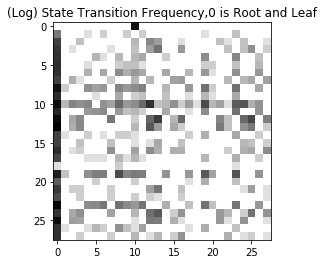

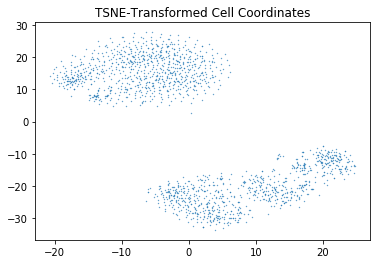

3195


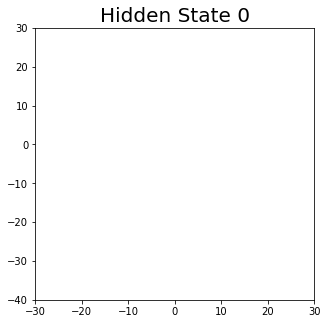

21


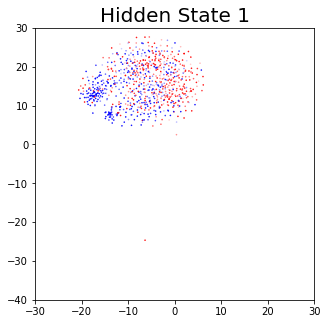

59


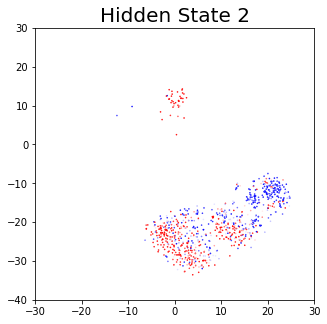

84


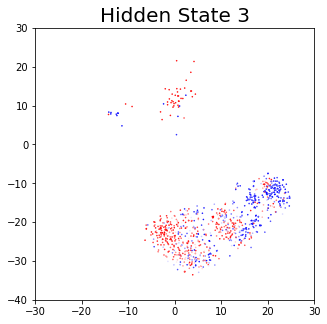

81


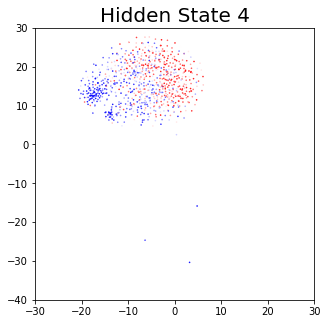

74


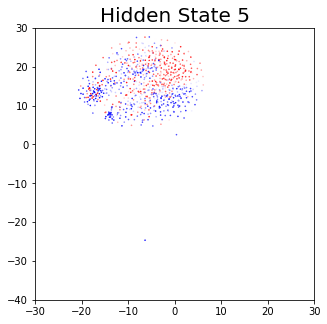

100


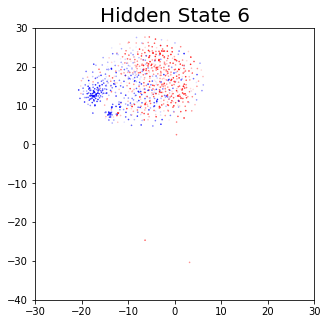

69


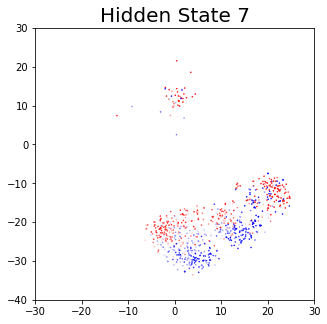

187


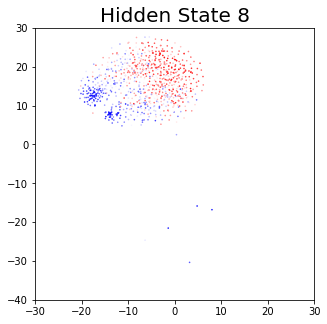

77


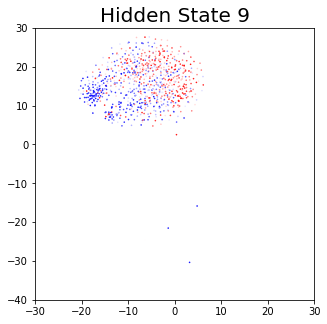

343


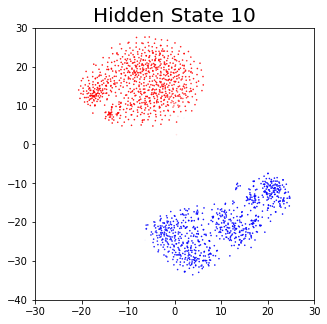

123


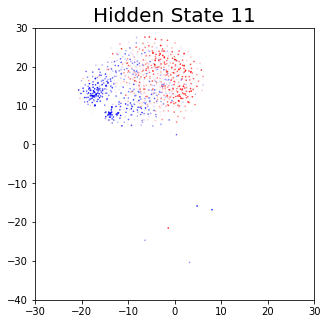

277


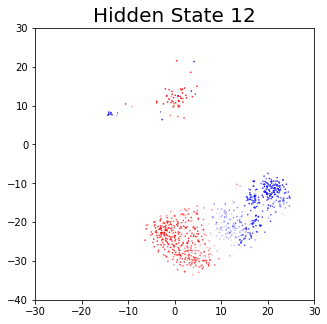

227


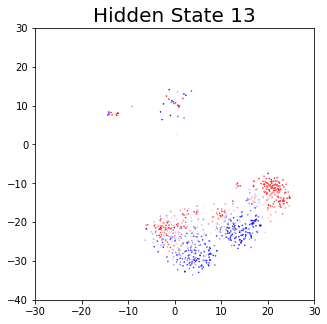

54


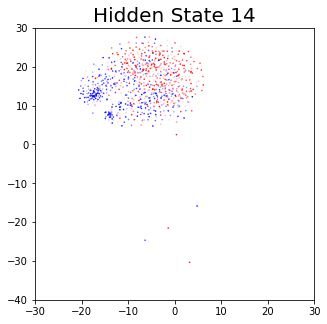

52


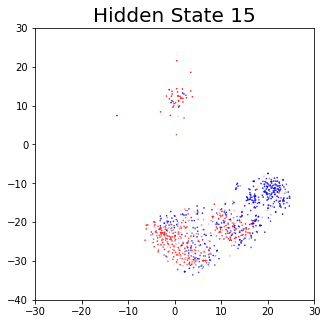

97


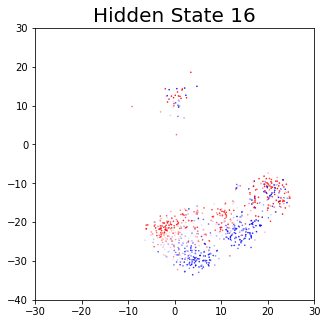

51


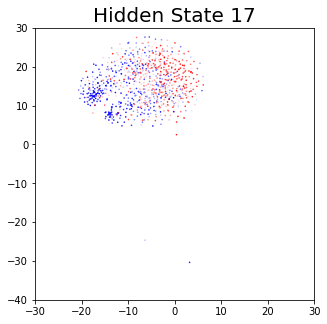

5


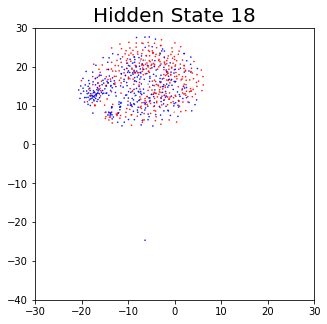

216


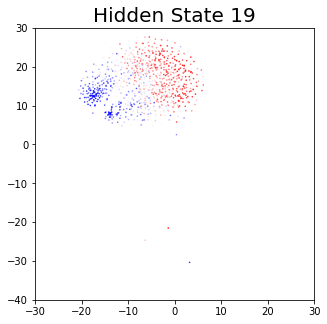

31


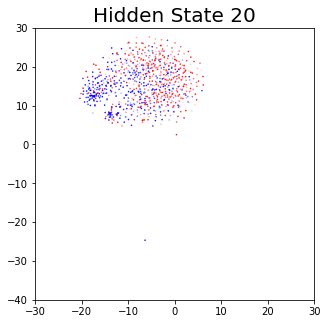

72


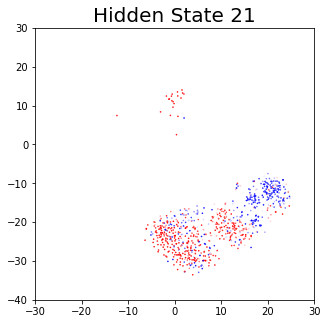

38


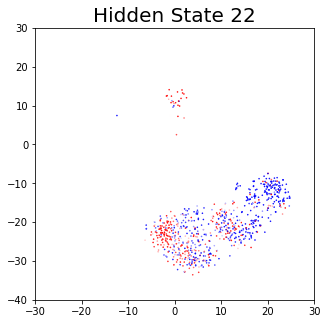

218


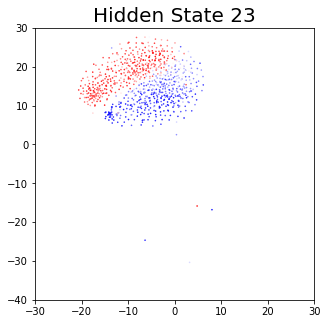

132


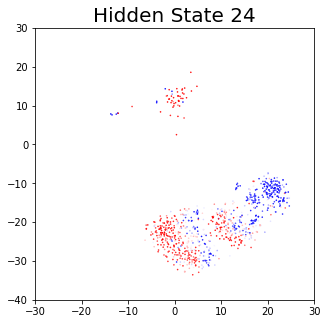

161


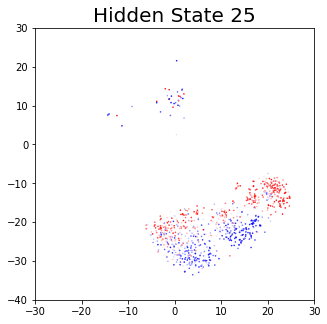

75


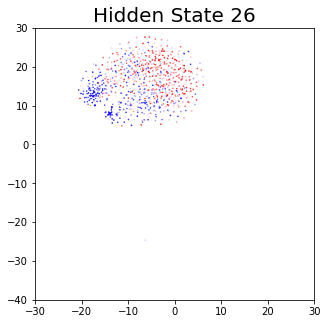

71


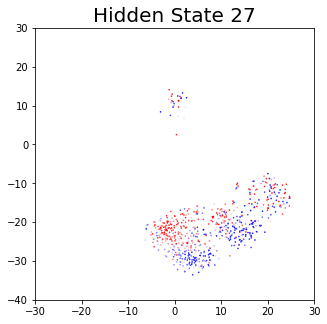

In [49]:
plt.figure()
plt.title("(Log) State Transition Frequency,0 is Root and Leaf")
plt.imshow(np.log(braid.pad_root_transitions(braid.transition_counts).T),cmap='binary')
plt.show()
  
# print(braid.state_raw_sample_odds[1])

iftc=forest.tsne_encoding()

for hidden_state in range(braid.hidden_states):
    print(np.sum(braid.state_masks[hidden_state]))
    plt.figure(figsize=(5,5))
    plt.title(f"Hidden State {hidden_state}",fontsize=20)
    plt.scatter(iftc[:,0],iftc[:,1],c=braid.lr_finite(hidden_state),cmap='bwr',s=.3)
    plt.xlim(-30,30)
    plt.ylim(-40,30)
#     plt.scatter(ttc[:,0],ttc[:,1],c=braid.state_raw_sample_odds[hidden_state],s=1,cmap='PuOr')
    plt.show()
        

In [ ]:
len(forest.nodes())